In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('dataset_modelling.csv')
reviews = data['Review'].tolist()
labels = data['Label'].tolist()

In [3]:
# Mapping labels to numerical values
label_dict = {'positive': 0, 'negative': 1, 'neutral': 2}
labels = [label_dict[label] for label in labels]

In [4]:
# Splitting into training and validation sets
train_text, val_text, train_labels, val_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42)

In [5]:
# Tokenization and sequence padding
max_features = 10000  # Set the maximum number of words to tokenize
max_len = 100  # Set the maximum sequence length
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_text)
train_sequences = tokenizer.texts_to_sequences(train_text)
val_sequences = tokenizer.texts_to_sequences(val_text)
train_sequences = pad_sequences(train_sequences, maxlen=max_len)
val_sequences = pad_sequences(val_sequences, maxlen=max_len)

In [6]:
# Convert labels to numpy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [7]:
# Define the LSTM model for multi-class classification
num_classes = 3  # Three classes: positive, negative, neutral
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_data=(val_sequences, val_labels))

Epoch 1/10


397/397 [==============================] - 61s 146ms/step - loss: 0.2450 - accuracy: 0.9213 - val_loss: 0.1237 - val_accuracy: 0.9468
Epoch 2/10
397/397 [==============================] - 58s 145ms/step - loss: 0.1046 - accuracy: 0.9587 - val_loss: 0.0795 - val_accuracy: 0.9761
Epoch 3/10
397/397 [==============================] - 59s 148ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 4/10
397/397 [==============================] - 59s 148ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0340 - val_accuracy: 0.9880
Epoch 5/10
397/397 [==============================] - 58s 147ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 6/10
397/397 [==============================] - 59s 149ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.0335 - val_accuracy: 0.9921
Epoch 7/10
397/397 [==============================] - 58s 147ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0508 - val_

In [10]:
# Make predictions on the validation set
val_predictions_probs = model.predict(val_sequences)
val_predictions = np.argmax(val_predictions_probs, axis=1)

# Generate classification report
report = classification_report(val_labels, val_predictions, target_names=label_dict.keys())

# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)

100/100 [==============================] - 3s 21ms/step


In [11]:
# Display the classification report and accuracy
print("Classification Report:")
print(report)
print(f"Accuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

    positive       0.99      1.00      0.99      2847
    negative       0.95      0.93      0.94       194
     neutral       0.92      0.88      0.90       135

    accuracy                           0.99      3176
   macro avg       0.95      0.94      0.95      3176
weighted avg       0.99      0.99      0.99      3176

Accuracy: 98.77%


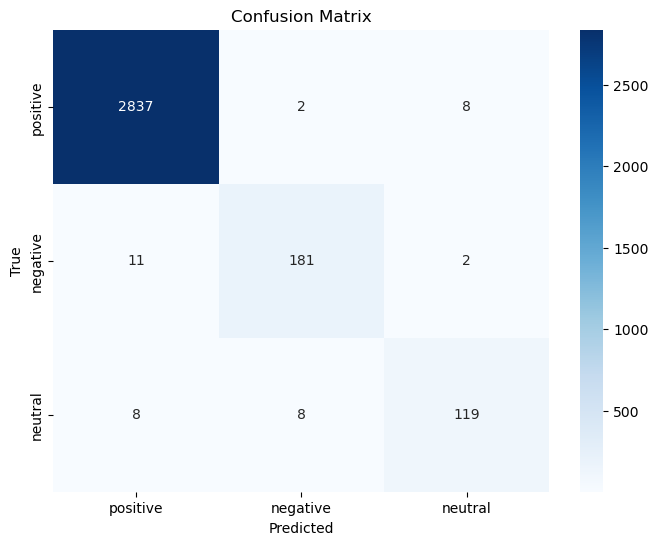

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Plotting Training and Validation Accuracy and Loss
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

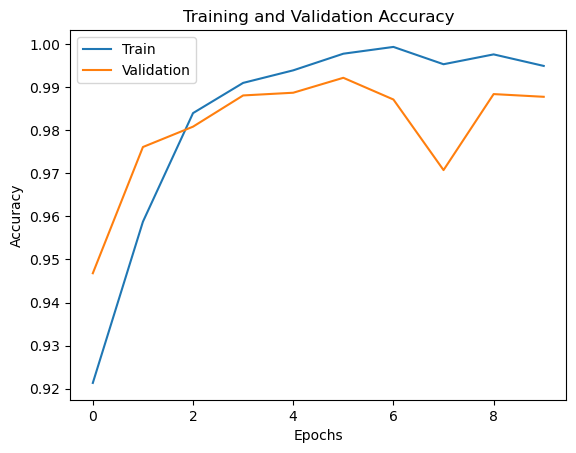

In [14]:
# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

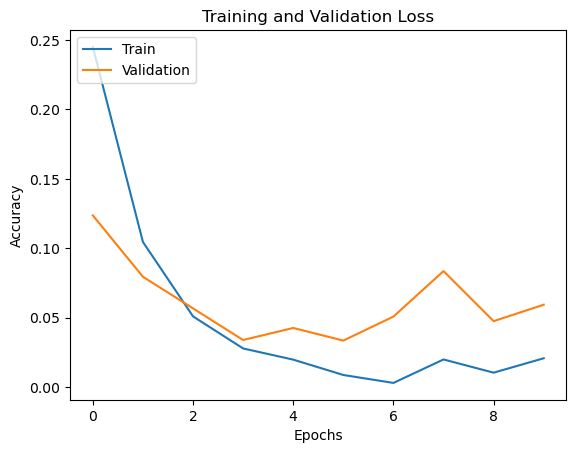

In [15]:
# Plotting Training and Validation Accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()